<a href="https://colab.research.google.com/github/toupasana/Exploratory-Data-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

##"I don't guess. I observe and once I've observed, I deduce."

~ A Sherlock Holmes quote from the tv series 'Elementary' ~



Sherlock Holmes - the famous fictional detective created by British author Sir Arthur Conan Doyle is known for his proficiency with observation, deduction, forensic science, and logical reasoning that borders on the fantastic, which he employs when investigating cases for a wide variety of clients.

This quote itself explains why Holmes is a great detective. Merely guessing from a dataset without observing, cleaning and analysing will lead you to twist facts to suit your own superficial and biased theories. Which is actually what no one is expecting from an analyst, but an eagle eye that drives after its prey.

The process of diving into your given information would rather seem cumbersome, but it's something that is unavoidable and time consuming. So without further due, let's embark on a journey to deduce the key understandings of the Airbnb business model.

# 1.Setting the Stage

---



In [ ]:
#Load the goodies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#Mount the tank
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Supply the energy
airbnb_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Projects/AirBnB Booking Analysis/Airbnb NYC 2019.csv')

# 2.Exploring the waters

---



In [ ]:
#Take the first look
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#Identify different charachteristics of the fuel
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#Identify the size
airbnb_df.shape

(48895, 16)

In [ ]:
#Crunch the numbers   
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Looking for the lost souls


* Why look for the null values?  - these unrecorded information might play a prominent role in our analysis by providing us with important answers to hidden questions, might even lead us towards false predicitons and sometimes may not even affect at all. So it's always a better practice to catch the lost souls before moving on.

* Few doubts that pop up in our analytical minds are...

 * How ubiquitous are the missing values?
 * Are they random?
 * Do they show a pattern?








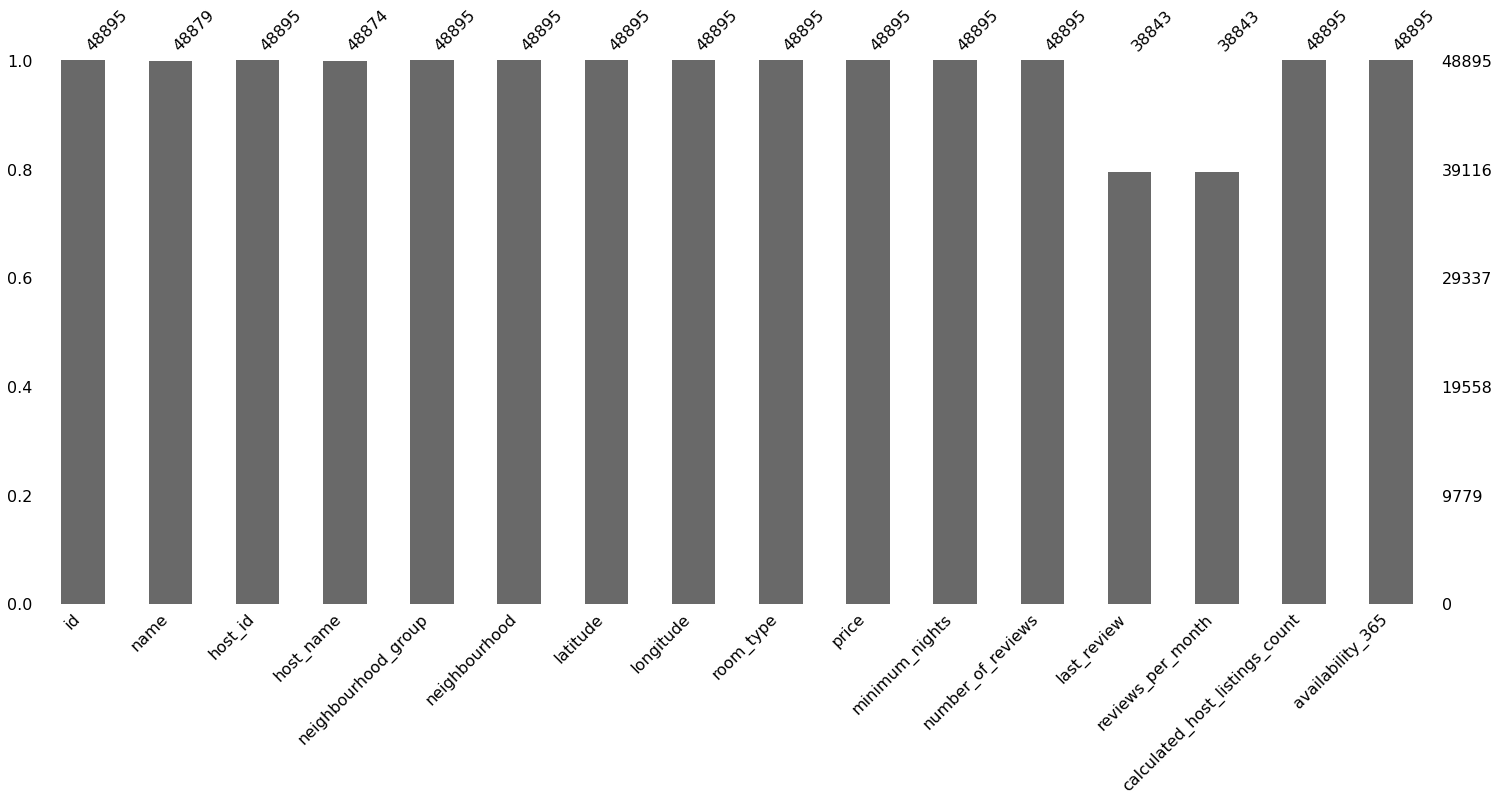

In [ ]:
#Visualize the missing values
msno.bar(airbnb_df)

Visible as they are even in the dark! These graphs are insanely handy when hunting for these lost souls, as they provide a clear overall picture of their whereabouts and sizes.

Apparantely, only two of them 'last_review' and 'reviews_per_month' are considerably missing, while values of 'name' and host_name' are negligible. Hence, this set of information is clean to a greater extent and these missing values could be replaced with a '0' or the particular corresponding variable could be removed completely if more than 50% of the data are null values as a rule of thumb in order to make sure they won't affect our future analysis.

## Moving on with the next steps, let's take a sneak peek at the count and percentages of the null values before we proceed further...

In [ ]:
#Dig into the count and percentages
tot_missing = airbnb_df.isnull().sum().sort_values(ascending=False)
percent_missing = (airbnb_df.isnull().sum()* 100 / len(airbnb_df)).round(2).sort_values(ascending=False)
lost_souls = pd.concat([tot_missing, percent_missing], axis=1, keys=['Total', 'Percentage'])
lost_souls.head(20)

,Total,Percentage
reviews_per_month,10052,20.56
last_review,10052,20.56
host_name,21,0.04
name,16,0.03
availability_365,0,0.00
calculated_host_listings_count,0,0.00
number_of_reviews,0,0.00
minimum_nights,0,0.00
price,0,0.00
room_type,0,0.00


[Text(0, 0, 'reviews_per_month'),
 Text(0, 0, 'last_review'),
 Text(0, 0, 'host_name'),
 Text(0, 0, 'name'),
 Text(0, 0, 'availability_365'),
 Text(0, 0, 'calculated_host_listings_count'),
 Text(0, 0, 'number_of_reviews'),
 Text(0, 0, 'minimum_nights'),
 Text(0, 0, 'price'),
 Text(0, 0, 'room_type'),
 Text(0, 0, 'longitude'),
 Text(0, 0, 'latitude'),
 Text(0, 0, 'neighbourhood'),
 Text(0, 0, 'neighbourhood_group'),
 Text(0, 0, 'host_id'),
 Text(0, 0, 'id')]

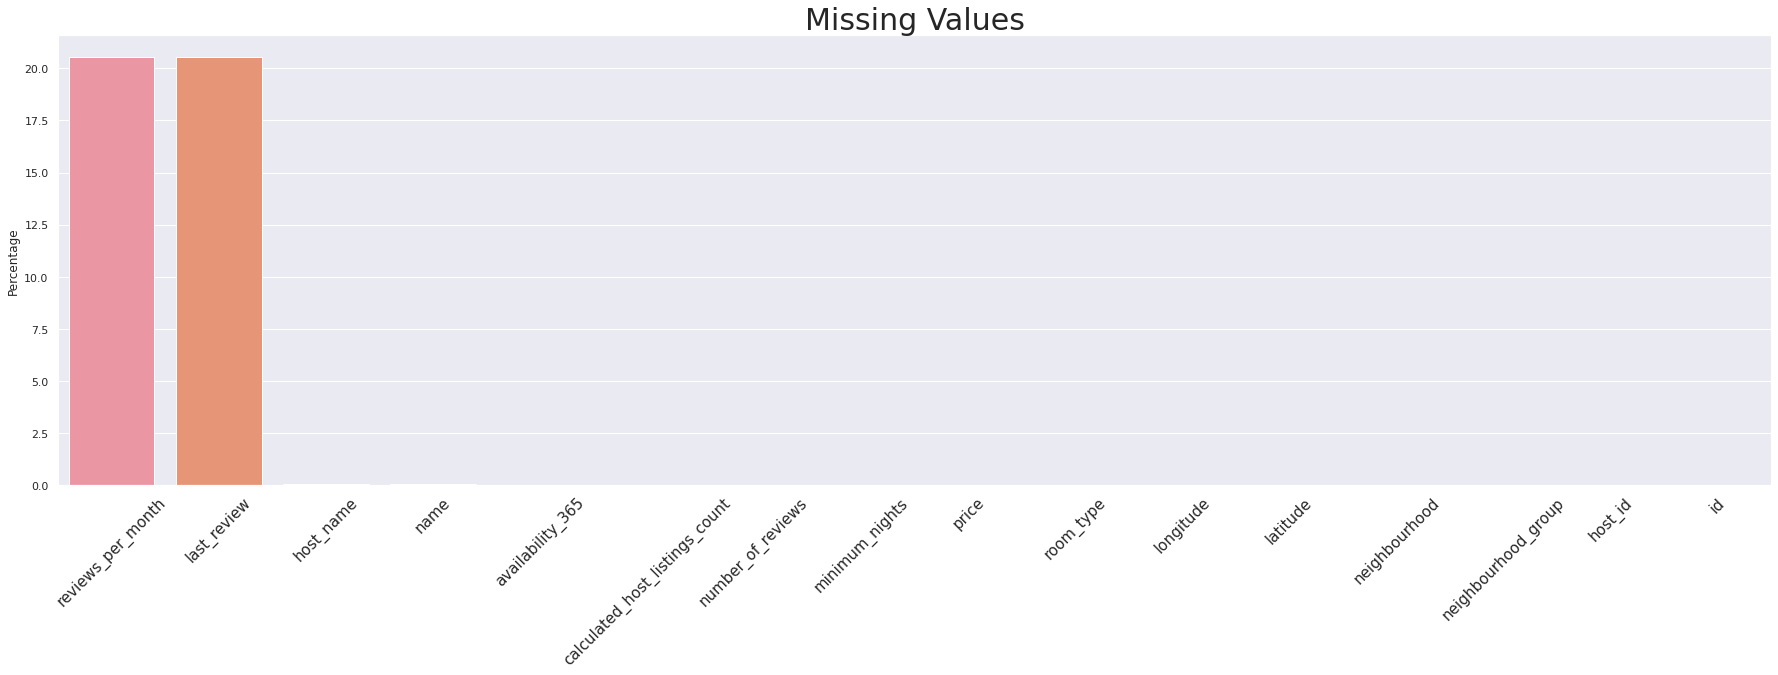

In [ ]:
#Visualize the numbers
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(30.7,8.27)})

vis_missing = sns.barplot(x=lost_souls.index, y='Percentage', data=lost_souls)

vis_missing.set_title('Missing Values', fontsize = 30)
vis_missing.set_xticklabels(vis_missing.get_xmajorticklabels(), fontsize = 15, rotation=45)

Mmmmm...magnificent! This reveals columns "last_review" and "review_per_month" only need a quick replacement with the ever loving number '0' used when filling up the null values in data analysis. But before that let's get rid of the unwanted!

# 3.First Move - Getting rid of the misfits!



---



## Why remove them? 
Columns "id", "host_name" and "last_review" are irrelevant and insignificant to our data analysis since they will not provide crucial insights to our questions. Hence, we shall take our first move by removing them...

In [ ]:
#Kick out the misfits
airbnb_df.drop(['id','host_name','last_review'], axis=1, inplace=True)

In [ ]:
#A quick look at the new results
airbnb_df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


Voila! Done and dusted! Removing the misfits have cleared the path to a better concise understanding of the dataset. What else is better than data that's not noisy! 

But, One more step to go...

## Bringing in the most wanted!

In [ ]:
#Replace the lost souls with 0
airbnb_df['reviews_per_month'].fillna('0', inplace=True)

In [ ]:
#Reassure their replacement
airbnb_df['reviews_per_month'].isnull().sum()

0

Finally, we got rid of the noisiness in our dataset and it's ready for further advanced exploration. Ahoy! Let's venture into the unexplored territories! 

# 4.What can we learn about different hosts and areas?